Loan Approval Prediction using Machine Learning

This script applies 5 different Machine Learning algorithms to predict whether a loan should be approved for a customer based on their personal and financial data. The goal is to compare the performance of these models and identify the most accurate and efficient one for the final prediction.

________________________________________________________________________

Import all the necessary libraries

In [438]:
# Core libraries
import numpy as np
import pandas as pd
import os
import warnings

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

# Preprocessing & Metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    classification_report,
    confusion_matrix
)

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

# Deep Learning (Keras / TensorFlow)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LSTM


Read the test and train datasets and analyse the number of rows and columns


In [439]:
df_train=pd.read_csv('/content/Train_Loan_Home.csv')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Read test dataset

In [440]:
df_test=pd.read_csv('/content/Test_Loan_Home.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncomeMonthly,CoapplicantIncomeMonthly,LoanAmountThousands,Loan_Amount_Term_Months,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Dataset Overview & Preprocessing

In [441]:
df_train.shape
df_test.shape

(367, 12)

In [442]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Co

Train and test dataset has 13 and 12 columns respectively, train dataset has loan status column to identify suitable candidates

Remove 'Loan_ID' from train and test sets; save test IDs for later.



In [443]:
df_train.drop('Loan_ID',axis=1,inplace=True)
df_test_id=df_test['Loan_ID']
df_test.drop('Loan_ID',axis=1,inplace=True)

In [444]:
df_train.dtypes
df_test.dtypes

,0
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncomeMonthly,int64
CoapplicantIncomeMonthly,int64
LoanAmountThousands,float64
Loan_Amount_Term_Months,float64
Credit_History,float64


Check for nulls and fill missing values

Used mode for categorical and median for numerical features.



In [445]:
df_train.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [446]:
df_train["Gender"].replace(np.nan,df_train['Gender'].mode()[0],inplace=True)
df_train['Married'].replace(np.nan,df_train['Married'].mode()[0],inplace=True)
df_train['Dependents'].replace(np.nan,df_train['Dependents'].mode()[0],inplace=True)
df_train['Self_Employed'].replace(np.nan,df_train['Self_Employed'].mode()[0],inplace=True)
df_train['Loan_Amount_Term'].replace(np.nan,df_train['Loan_Amount_Term'].mode()[0],inplace=True)
df_train['Credit_History'].replace(np.nan,df_train['Credit_History'].mode()[0],inplace=True)

In [447]:
df_train['LoanAmount'].replace(np.nan,df_train['LoanAmount'].median(),inplace=True)

In [448]:
df_train.isnull().sum()


,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


Removing Outliers

Apply log transformation to 'LoanAmount' to reduce skewness and mitigate outliers, then drop the original 'LoanAmount' column. Separate features and target variable for modeling.

<Axes: xlabel='LoanAmount_Log', ylabel='Density'>

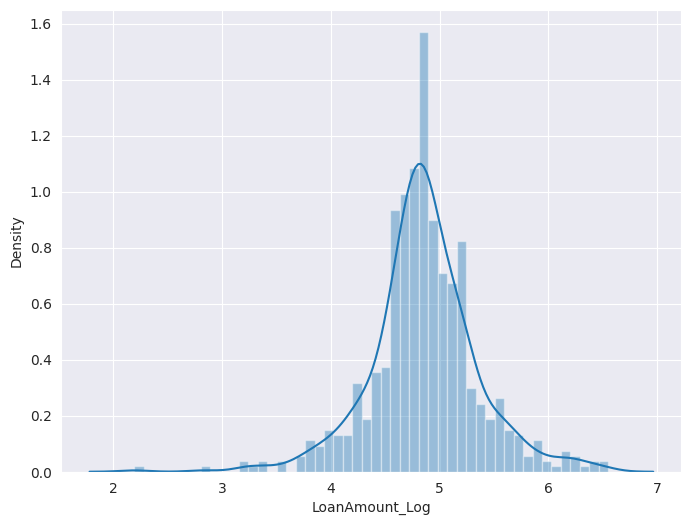

In [449]:
df_train['LoanAmount_Log']=np.log(df_train['LoanAmount'])
sns.distplot(df_train['LoanAmount_Log'],bins=50)

In [450]:
df_train.drop('LoanAmount',axis=1,inplace=True)
df_train_temp=df_train.drop('Loan_Status',axis=1)
df_train_status = df_train['Loan_Status']

Convert Categorical data to Numerical Values

In [451]:
categorical_features=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Amount_Term',
 'Credit_History']
le=LabelEncoder()
for i in categorical_features:
    df_train_temp[i]=le.fit_transform(df_train_temp[i])

In [452]:
df_train_temp.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Log
0,1,0,0,0,0,5849,0.0,8,1,2,4.852030
1,1,1,1,0,0,4583,1508.0,8,1,0,4.852030
2,1,1,0,0,1,3000,0.0,8,1,2,4.189655
3,1,1,0,1,0,2583,2358.0,8,1,2,4.787492
4,1,0,0,0,0,6000,0.0,8,1,2,4.948760


Heatmap of feature correlations in the training dataset.



<Axes: >

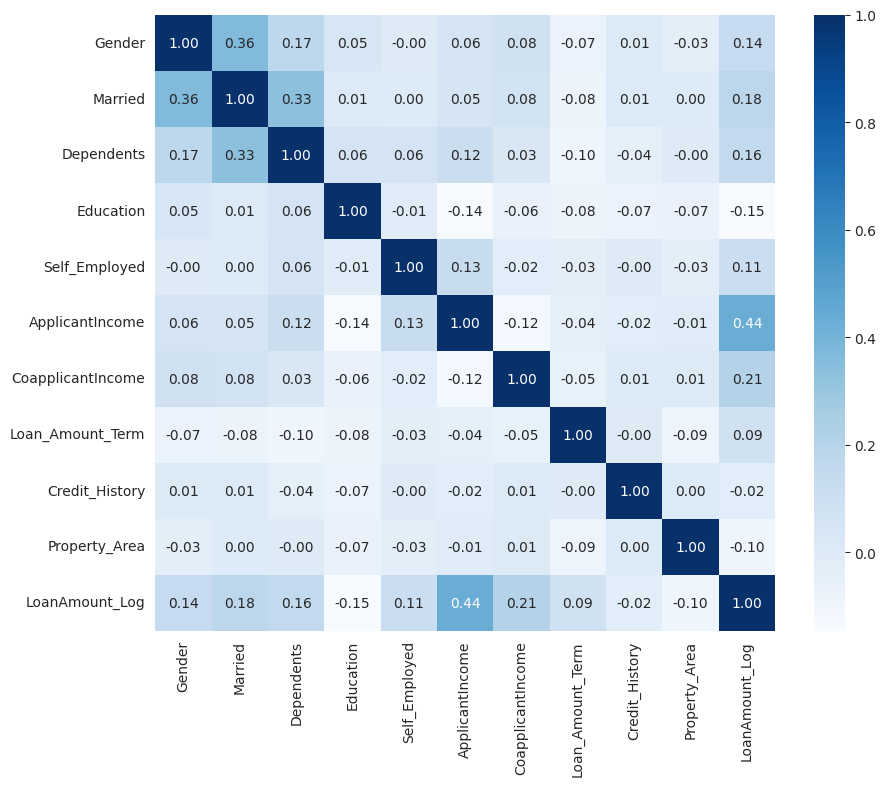

In [453]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train_temp.corr(),annot=True,fmt='.2f',cmap='Blues')

Feature importance scores from ExtraTreesClassifier trained on the training data.


In [454]:
etc=ExtraTreesClassifier(n_estimators=100)
etc.fit(df_train_temp,df_train_status)
values=pd.Series(etc.feature_importances_)

<Axes: >

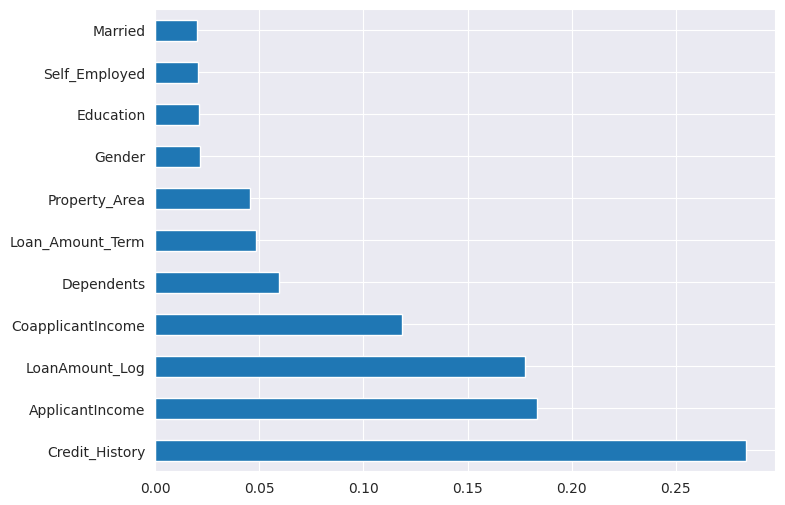

In [455]:
values.index=df_train_temp.columns
values.sort_values(ascending=False).plot(kind='barh')

From the above diagram it is clear that the Credit History is the most important feature in the dataset that means customers who have paid their previous debts have higher chance to get loan approval

Normalising the Dataset

In [456]:
df_train_norm=StandardScaler().fit_transform(df_train_temp)
df_train_norm[0:5]

array([[ 0.47234264, -1.37208932, -0.73780632, -0.52836225, -0.39260074,
         0.07299082, -0.55448733,  0.29977577,  0.41173269,  1.22329839,
        -0.01053273],
       [ 0.47234264,  0.72881553,  0.25346957, -0.52836225, -0.39260074,
        -0.13441195, -0.03873155,  0.29977577,  0.41173269, -1.31851281,
        -0.01053273],
       [ 0.47234264,  0.72881553, -0.73780632, -0.52836225,  2.54711697,
        -0.39374734, -0.55448733,  0.29977577,  0.41173269,  1.22329839,
        -1.34706757],
       [ 0.47234264,  0.72881553, -0.73780632,  1.89264089, -0.39260074,
        -0.46206247,  0.2519796 ,  0.29977577,  0.41173269,  1.22329839,
        -0.14075792],
       [ 0.47234264, -1.37208932, -0.73780632, -0.52836225, -0.39260074,
         0.09772844, -0.55448733,  0.29977577,  0.41173269,  1.22329839,
         0.18464737]])

Repeating the same steps on the test dataset

In [457]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncomeMonthly,CoapplicantIncomeMonthly,LoanAmountThousands,Loan_Amount_Term_Months,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [458]:
df_test.rename(columns={'ApplicantIncomeMonthly':'ApplicantIncome','CoapplicantIncomeMonthly':'CoapplicantIncome','LoanAmountThousands':'LoanAmount','Loan_Amount_Term_Months':'Loan_Amount_Term'},inplace=True)

In [459]:
df_test.isnull().sum()

,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6
Credit_History,29


In [460]:
df_test['Gender'].replace(np.nan,df_test['Gender'].mode()[0],inplace=True)
df_test['Dependents'].replace(np.nan,df_test['Dependents'].mode()[0],inplace=True)
df_test['Self_Employed'].replace(np.nan,df_test['Self_Employed'].mode()[0],inplace=True)
df_test['LoanAmount'].replace(np.nan,df_test['LoanAmount'].median(),inplace=True)
df_test['Loan_Amount_Term'].replace(np.nan,df_test['Loan_Amount_Term'].mode()[0],inplace=True)
df_test['Credit_History'].replace(np.nan,df_test['Credit_History'].mode()[0],inplace=True)


In [461]:
df_test.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [462]:
for i in categorical_features:
    df_test[i]=LabelEncoder().fit_transform(df_test[i])
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,10,1,2
1,1,1,1,0,0,3076,1500,126.0,10,1,2
2,1,1,2,0,0,5000,1800,208.0,10,1,2
3,1,1,2,0,0,2340,2546,100.0,10,1,2
4,1,0,0,1,0,3276,0,78.0,10,1,2


In [463]:
df_test['LoanAmount_log']=np.log(df_test['LoanAmount'])
df_test.drop('LoanAmount',axis=1,inplace=True)
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,1,1,0,0,0,5720,0,10,1,2,4.700480
1,1,1,1,0,0,3076,1500,10,1,2,4.836282
2,1,1,2,0,0,5000,1800,10,1,2,5.337538
3,1,1,2,0,0,2340,2546,10,1,2,4.605170
4,1,0,0,1,0,3276,0,10,1,2,4.356709


In [464]:
df_test_norm=StandardScaler().fit_transform(df_test)
df_test_norm[0:5]

array([[ 0.48547939,  0.75835829, -0.75822199, -0.5448117 , -0.33484506,
         0.1864605 , -0.67333511,  0.30677633,  0.4376739 ,  1.11876379,
        -0.30445573],
       [ 0.48547939,  0.75835829,  0.18187082, -0.5448117 , -0.33484506,
        -0.35269225, -0.02984821,  0.30677633,  0.4376739 ,  1.11876379,
         0.02228726],
       [ 0.48547939,  0.75835829,  1.12196363, -0.5448117 , -0.33484506,
         0.0396413 ,  0.09884917,  0.30677633,  0.4376739 ,  1.11876379,
         1.22832616],
       [ 0.48547939,  0.75835829,  1.12196363, -0.5448117 , -0.33484506,
        -0.50277411,  0.41887666,  0.30677633,  0.4376739 ,  1.11876379,
        -0.53377517],
       [ 0.48547939, -1.31863792, -0.75822199,  1.83549656, -0.33484506,
        -0.31190914, -0.67333511,  0.30677633,  0.4376739 ,  1.11876379,
        -1.13158141]])

Split normalized training data into training and validation sets (75% train, 25% validation)

In [465]:
x_train,x_val,y_train,y_val=train_test_split(df_train_norm,df_train_status,test_size=0.25,random_state=42)
x_train.shape,y_train.shape,x_val.shape,y_val.shape

((460, 11), (460,), (154, 11), (154,))

Models

In [466]:
accuracy=[]
f1=[]
model=[]

Logistic Regression model trained and evaluated; performance visualized with confusion matrix heatmap

In [467]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_hat=lr.predict(x_val)

In [468]:
accuracy.append(np.round(accuracy_score(y_val,y_hat),2))
f1.append(np.round(f1_score(y_val,y_hat,average='weighted'),2))
model.append('Logistic Regression')

<Axes: >

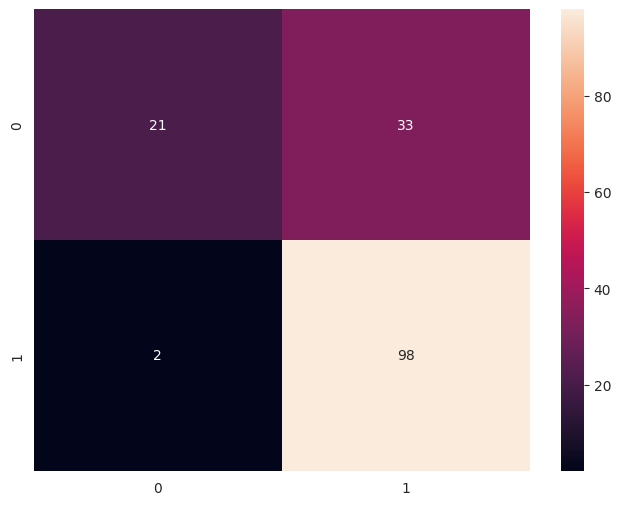

In [469]:
sns.heatmap(confusion_matrix(y_val,y_hat),annot=True,fmt='.0f')


Support Vector Machine

In [470]:
svc=SVC()
svc.fit(x_train,y_train)
y_hat=svc.predict(x_val)

In [471]:
accuracy.append(np.round(accuracy_score(y_val,y_hat),2))
f1.append(np.round(f1_score(y_val,y_hat,average='weighted'),2))
model.append('SVC')

<Axes: >

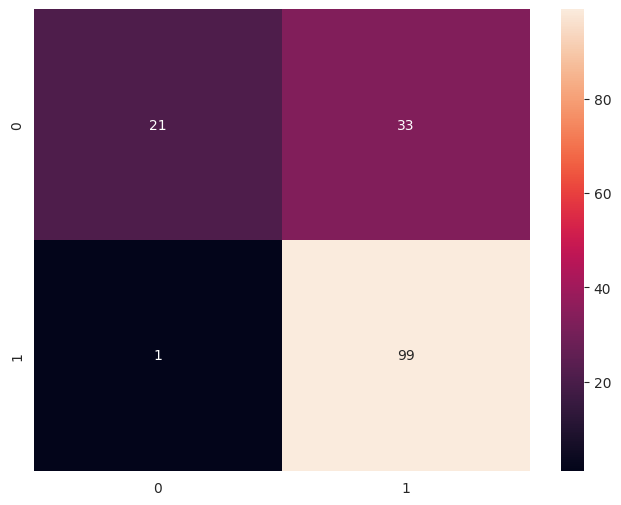

In [472]:
sns.heatmap(confusion_matrix(y_val,y_hat),annot=True,fmt='.0f')


Keras Multi-Layer Perceptron (MLP) model with 3 dense layers (64 and 32 neurons with ReLU activation, and 1 output neuron with sigmoid activation for binary classification) built and trained. Model performance evaluated and visualized with confusion matrix heatmap.

In [473]:
le = LabelEncoder()

y_train_nn = le.fit_transform(y_train)
y_val_nn = le.transform(y_val)

y_train_nn = y_train_nn.astype('float32')
y_val_nn = y_val_nn.astype('float32')


In [474]:
np.random.seed(42)
tf.random.set_seed(42)

model_nn = Sequential()
model_nn.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_nn.fit(x_train, y_train_nn, epochs=20, batch_size=32, validation_data=(x_val, y_val_nn), verbose=1)

y_pred_probs = model_nn.predict(x_val)
y_hat = (y_pred_probs > 0.5).astype("int32").flatten()

accuracy.append(np.round(accuracy_score(y_val_nn, y_hat), 2))
f1.append(np.round(f1_score(y_val_nn, y_hat, average='weighted'), 2))
model.append('Keras MLP')



Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5873 - loss: 0.7045 - val_accuracy: 0.7013 - val_loss: 0.6432
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7261 - loss: 0.5936 - val_accuracy: 0.7532 - val_loss: 0.5847
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7845 - loss: 0.5316 - val_accuracy: 0.7727 - val_loss: 0.5515
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8038 - loss: 0.4946 - val_accuracy: 0.7727 - val_loss: 0.5366
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8038 - loss: 0.4736 - val_accuracy: 0.7727 - val_loss: 0.5330
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8038 - loss: 0.4609 - val_accuracy: 0.7727 - val_loss: 0.5350
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8105 - loss: 0.4521 - val_accuracy: 0.7727 - val_loss: 0.5389
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8135 - loss: 0.4451 - val_accuracy: 0.7727 - val_los

<Axes: >

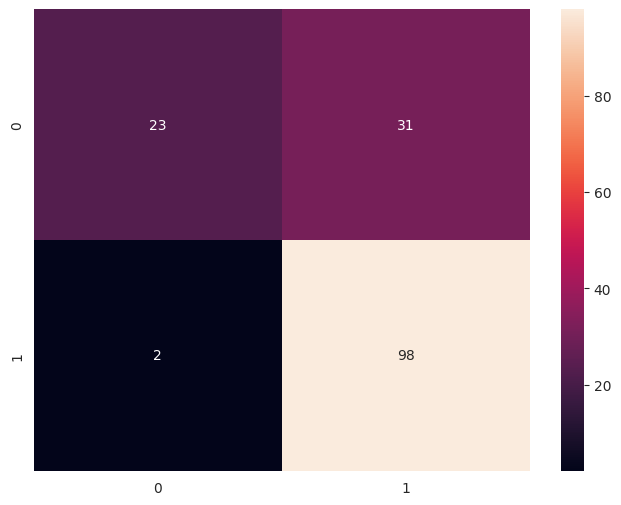

In [475]:
sns.heatmap(confusion_matrix(y_val_nn, y_hat), annot=True, fmt='.0f')

Deep Dense Neural Network with 4 layers: three Dense layers (128, 64, and 32 neurons) each followed by ReLU activation, with Batch Normalization applied after the first two Dense layers to improve training stability and performance. The final layer uses sigmoid activation for binary classification. Model trained for 30 epochs and evaluated with accuracy and F1 score.

In [476]:
model_bn = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_bn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_bn.fit(x_train, y_train_nn, epochs=30, batch_size=32, validation_data=(x_val, y_val_nn), verbose=1)

y_pred_probs = model_bn.predict(x_val)
y_hat = (y_pred_probs > 0.5).astype("int32").flatten()

accuracy.append(np.round(accuracy_score(y_val_nn, y_hat), 2))
f1.append(np.round(f1_score(y_val_nn, y_hat, average='weighted'), 2))
model.append('Deep Dense NN (with BatchNorm)')

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6709 - loss: 0.6340 - val_accuracy: 0.6429 - val_loss: 0.6581
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8315 - loss: 0.3938 - val_accuracy: 0.7338 - val_loss: 0.6367
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8475 - loss: 0.3581 - val_accuracy: 0.7727 - val_loss: 0.6153
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8541 - loss: 0.3290 - val_accuracy: 0.7727 - val_loss: 0.5956
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8683 - loss: 0.3014 - val_accuracy: 0.7857 - val_loss: 0.5794
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8751 - loss: 0.2771 - val_accuracy: 0.7857 - val_loss: 0.5647
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8853 - loss: 0.2539 - val_accuracy: 0.7922 - val_loss: 0.5517
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9083 - loss: 0.2324 - val_accuracy: 0.7857 - val_lo

<Axes: >

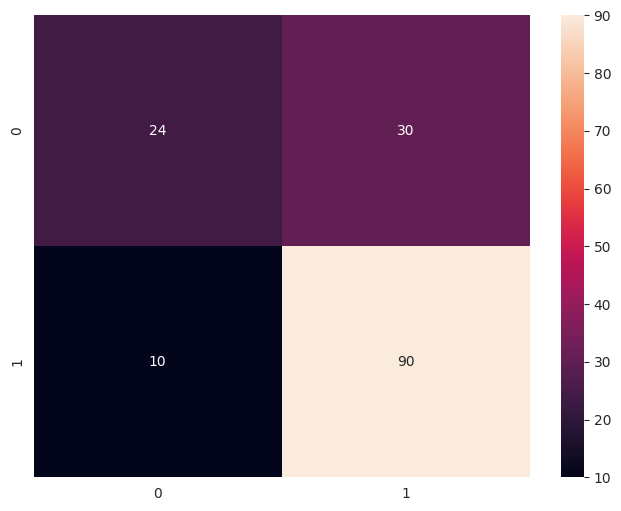

In [477]:
sns.heatmap(confusion_matrix(y_val_nn, y_hat), annot=True, fmt='.0f')


Simple LSTM model with one LSTM layer of 32 units, followed by a sigmoid-activated Dense layer for binary classification. Input data reshaped to 3D for RNN compatibility. Trained for 20 epochs and evaluated with accuracy and F1 score.

In [478]:
x_train_rnn = np.expand_dims(x_train, axis=2)
x_val_rnn = np.expand_dims(x_val, axis=2)

model_rnn = Sequential([
    LSTM(32, input_shape=(x_train_rnn.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_rnn.fit(x_train_rnn, y_train_nn, epochs=20, batch_size=32, validation_data=(x_val_rnn, y_val_nn), verbose=1)

y_pred_probs = model_rnn.predict(x_val_rnn)
y_hat = (y_pred_probs > 0.5).astype("int32").flatten()

accuracy.append(np.round(accuracy_score(y_val_nn, y_hat), 2))
f1.append(np.round(f1_score(y_val_nn, y_hat, average='weighted'), 2))
model.append('Simple LSTM')


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6245 - loss: 0.6833 - val_accuracy: 0.6753 - val_loss: 0.6714
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7072 - loss: 0.6520 - val_accuracy: 0.6558 - val_loss: 0.6500
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7055 - loss: 0.6163 - val_accuracy: 0.6558 - val_loss: 0.6688
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6758 - loss: 0.6164 - val_accuracy: 0.6494 - val_loss: 0.6562
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6752 - loss: 0.6088 - val_accuracy: 0.6429 - val_loss: 0.6484
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6825 - loss: 0.6025 - val_accuracy: 0.6429 - val_loss: 0.6481
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6858 - loss: 0.5987 - val_accuracy: 0.6364 - val_loss: 0.6463
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6865 - loss: 0.5940 - val_accuracy: 0.6429 - v

<Axes: >

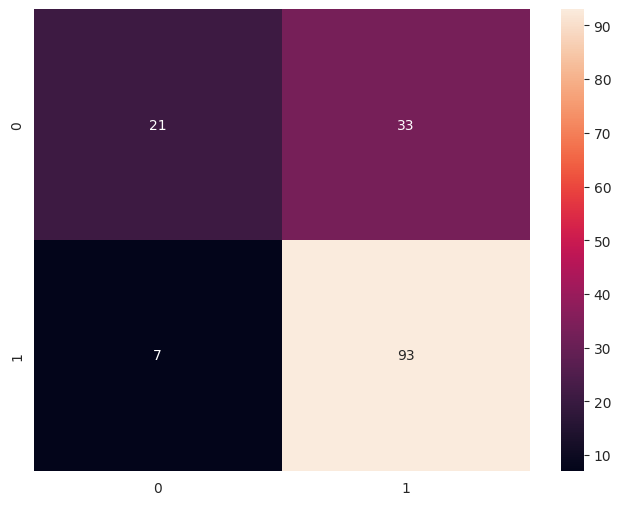

In [479]:
sns.heatmap(confusion_matrix(y_val_nn, y_hat), annot=True, fmt='.0f')


List all models used for training and evaluation.



In [480]:
model

['Logistic Regression',
 'SVC',
 'Keras MLP',
 'Deep Dense NN (with BatchNorm)',
 'Simple LSTM']

Create a DataFrame summarizing each model’s name along with its accuracy and F1 score.

In [481]:
output=pd.DataFrame({'Model':model,
                    'Accuracy':accuracy,
                    'F1 score':f1})
output

,Model,Accuracy,F1 score
0,Logistic Regression,0.77,0.74
1,SVC,0.78,0.75
2,Keras MLP,0.79,0.76
3,Deep Dense NN (with BatchNorm),0.74,0.72
4,Simple LSTM,0.74,0.71


From the results, it is evident that both SVC and Keras MLP achieve the highest accuracy and F1 score (0.78 and 0.75, respectively). However, since SVC is computationally less intensive than Keras MLP, we choose SVC as the prediction model for our test dataset.


In [482]:
y_pred=svc.predict(df_test_norm)
y_pred[0:5]

array(['Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [483]:
result=pd.DataFrame({'LoanID':df_test_id,
                    'Loan_Status':y_pred})
display(result)

,LoanID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
